### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-20,465662,5146467,771013,612587,292145,144308,133131,257891,119407,99067,87810,128054,128852,4849,200833
2021-11-21,465911,5150868,771118,612659,292372,144369,133177,259107,119424,99130,87810,128093,128956,4849,200866
2021-11-22,466147,5158099,772344,612782,292524,144414,133247,260319,119521,99437,87832,128138,129053,4849,200894
2021-11-23,466584,5166129,773770,613066,292524,144579,133330,261526,119605,99773,87866,128188,129177,4849,200931
2021-11-24,466980,5174661,775403,613339,292850,144728,133415,262733,119686,100123,87904,128236,129280,4849,200931


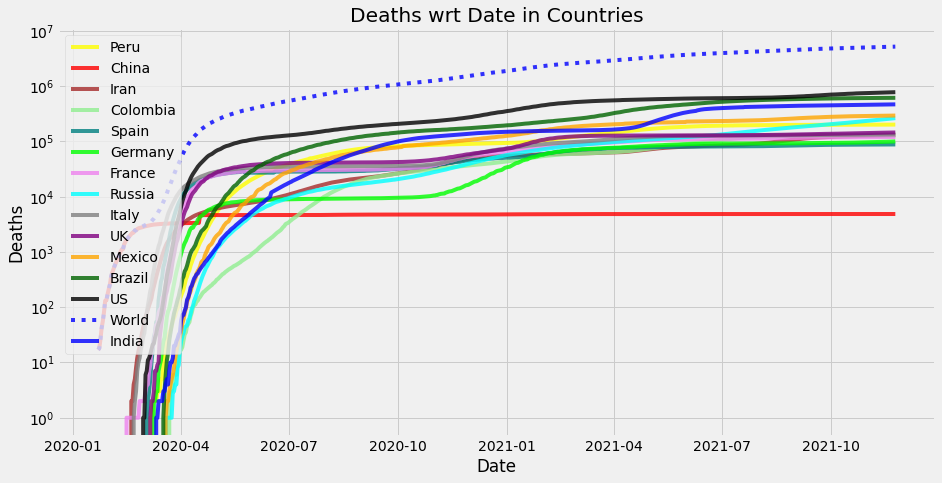

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-20,10488,476669,41493,8833,3837,40153,11540,35896,22701,45183,0,2590,3539,20,1725
2021-11-21,8488,387081,28719,5126,3306,39548,9707,35749,19757,26241,0,2649,4340,40,1465
2021-11-22,7579,631729,157580,2594,2141,45653,6403,34533,5339,47887,15875,2194,5427,22,773
2021-11-23,9283,606687,92609,10312,0,43020,10044,32899,30505,68049,6777,2478,5144,28,1539
2021-11-24,9119,670962,111272,12930,3698,42950,12450,32555,32633,79051,8527,2520,4813,25,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-20,12581,493323,84988,10833,3152,39344,6915,36203,11581,34948,3322,2059,7940,53,1089
2021-11-21,12308,486240,81237,10453,3162,39357,7101,36173,12126,34367,3101,2098,7700,52,1114
2021-11-22,11993,495939,86326,9929,3094,39777,7055,36063,11673,35269,3952,2104,7549,50,1091
2021-11-23,11812,503322,86745,9954,2888,39993,7254,35852,12929,37454,4141,2129,7388,48,1121
2021-11-24,11633,514498,88380,10153,2942,40190,7600,35633,14242,40227,4433,2155,7217,47,1046


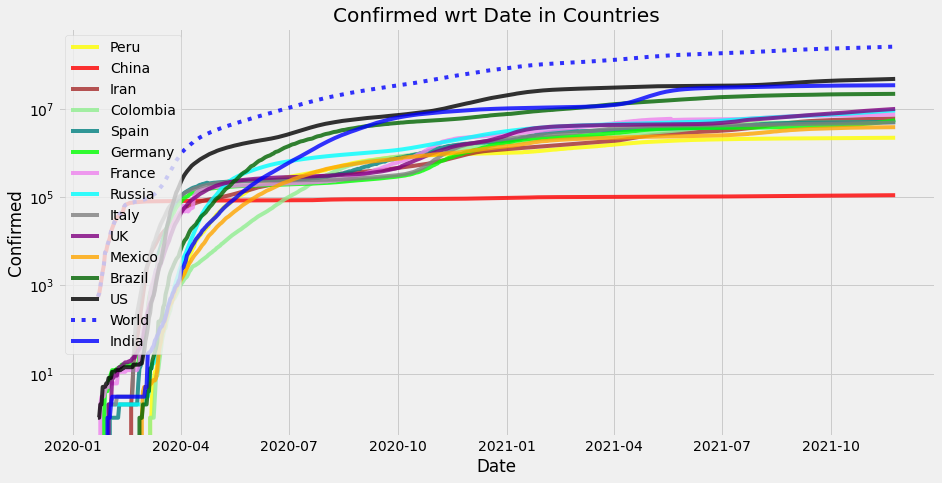

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-20,313,5948,322,217,216,150,49,1222,24,74,0,41,118,0,32
2021-11-21,249,4401,105,72,227,61,46,1216,17,63,0,39,104,0,33
2021-11-22,236,7231,1226,123,152,45,70,1212,97,307,22,45,97,0,28
2021-11-23,437,8030,1426,284,0,165,83,1207,84,336,34,50,124,0,37
2021-11-24,396,8532,1633,273,326,149,85,1207,81,350,38,48,103,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-20,352.78,7317.07,1184.53,247.81,197.81,159.23,54.04,1193.39,40.30,173.50,20.00,40.32,122.52,0.0,30.80
2021-11-21,339.81,6952.56,1049.59,225.83,201.45,146.95,53.03,1196.22,37.39,159.68,17.50,40.16,120.20,0.0,31.08
2021-11-22,326.83,6987.37,1071.64,212.98,195.27,134.21,55.16,1198.19,44.84,178.10,18.06,40.76,117.30,0.0,30.69
2021-11-23,340.60,7117.70,1115.93,221.86,170.86,138.06,58.64,1199.29,49.74,197.84,20.05,41.92,118.14,0.0,31.48
2021-11-24,347.53,7294.49,1180.57,228.25,190.26,139.42,61.93,1200.25,53.64,216.86,22.30,42.68,116.25,0.0,27.55


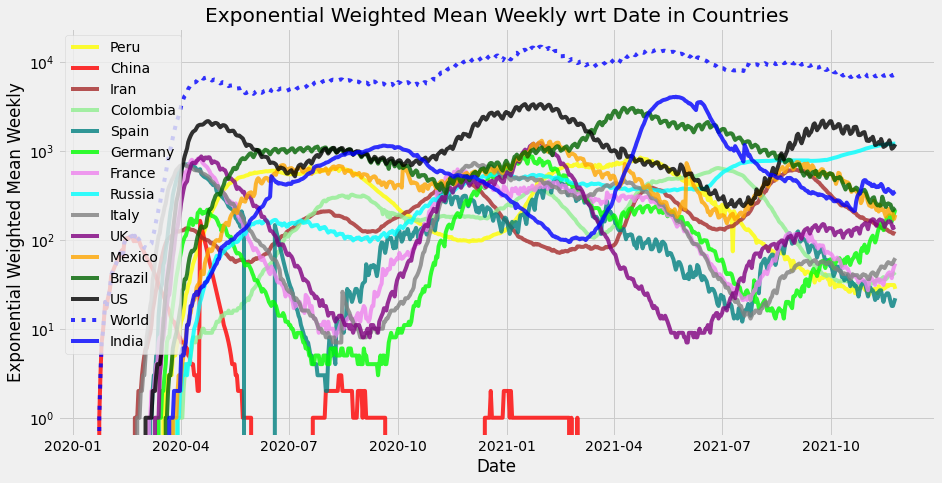

In [18]:
plotter(np.round(AVG), name)

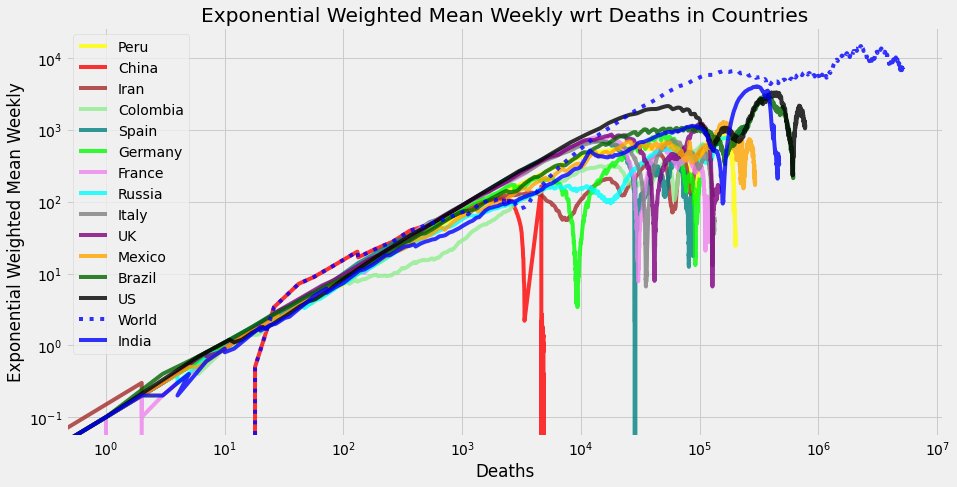

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

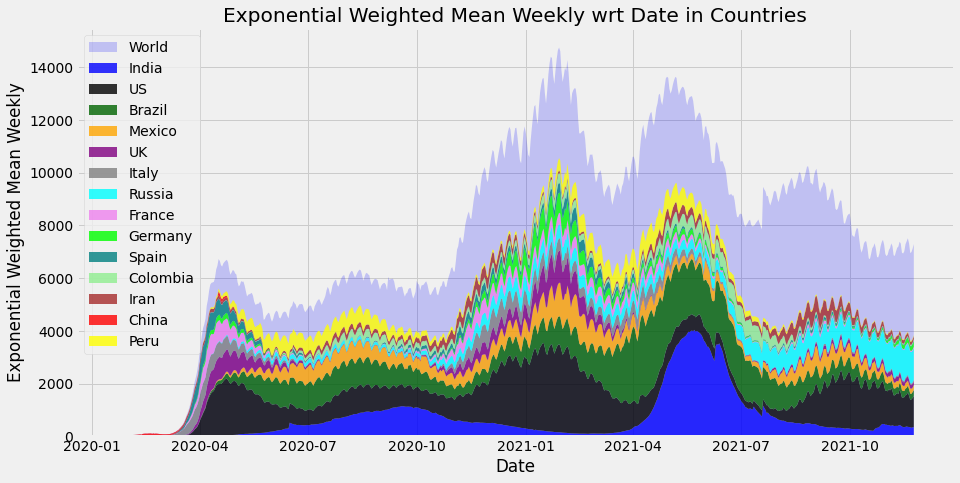

In [20]:
stackplotter(AVG, name)

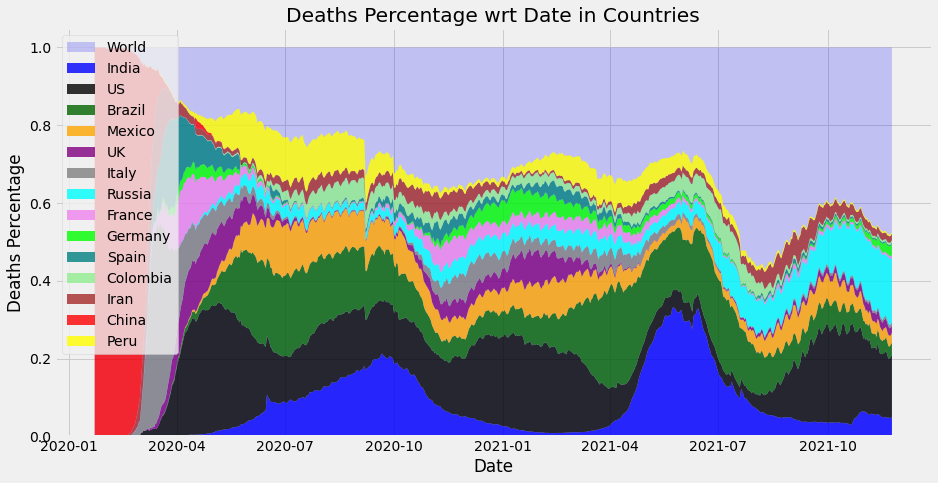

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

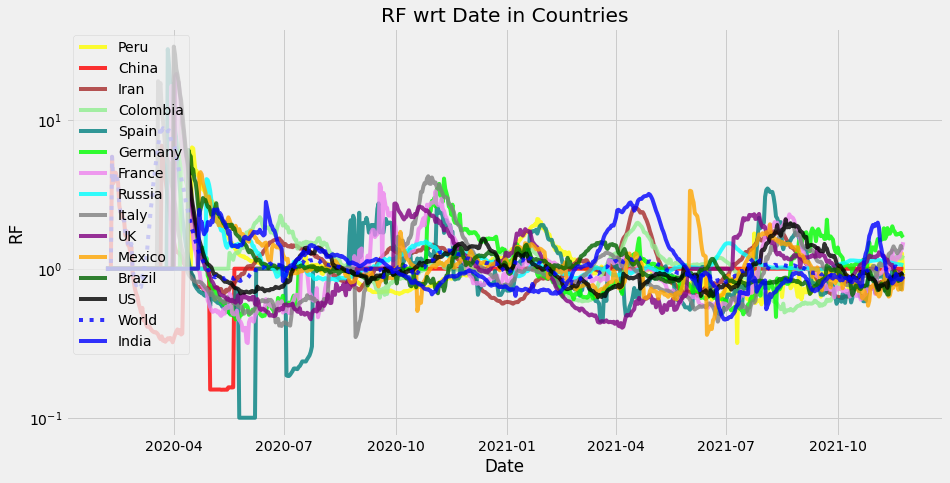

In [23]:
plotter(Reproductivity, 'RF')

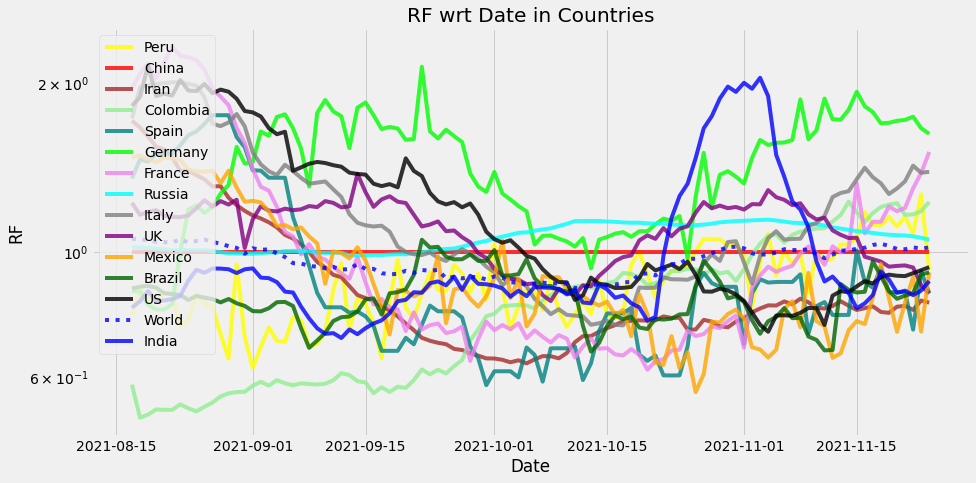

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

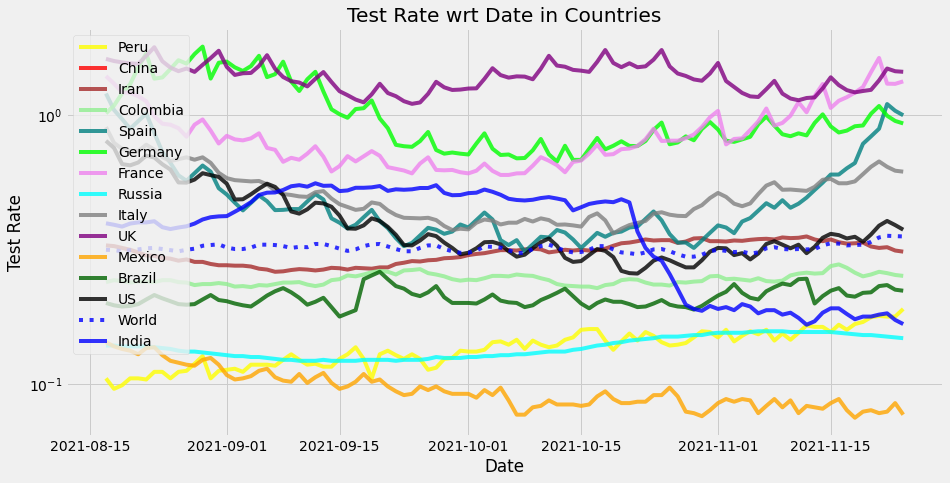

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

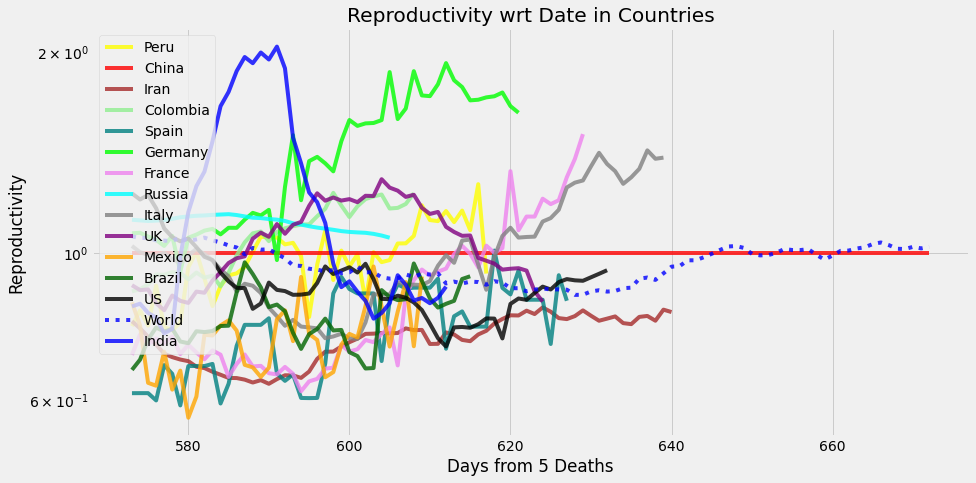

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

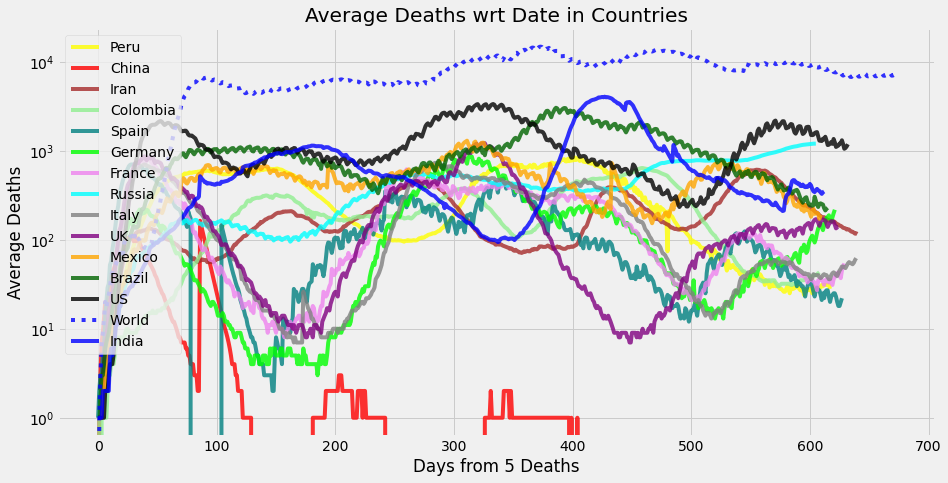

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

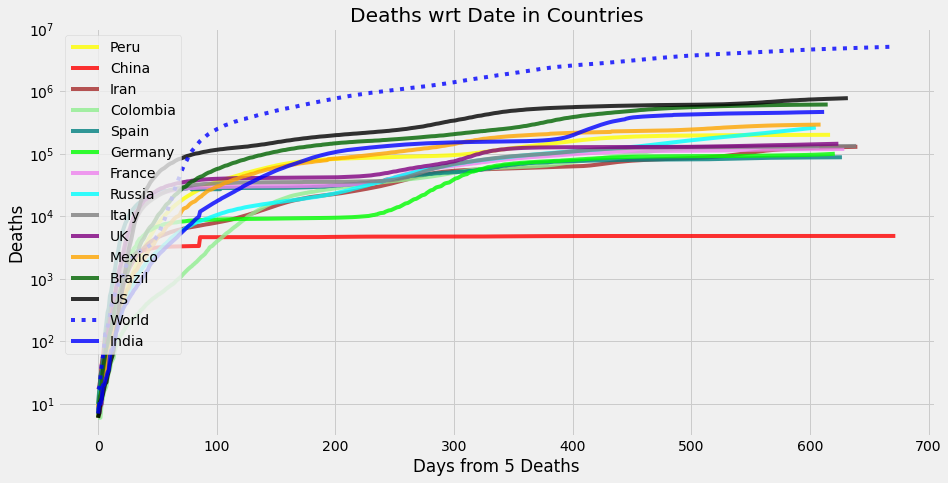

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5174661,8532,7237.00,7294.49,1.0202,259465151,0.353,514498,1034.93
US,775403,1633,1138.57,1180.57,0.9412,48092052,0.374,88380,155.08
Brazil,613339,273,212.57,228.25,0.9218,22043112,0.222,10153,122.67
India,466980,396,336.71,347.53,0.8893,34544882,0.167,11633,93.40
Mexico,292850,326,182.43,190.26,0.9210,3867976,0.077,2942,58.57
Russia,262733,1207,1214.86,1200.25,1.0532,9270885,0.148,35633,52.55
Peru,200931,0,27.14,27.55,0.9304,2226656,0.190,1046,40.19
UK,144728,149,132.71,139.42,0.8446,10028829,1.441,40190,28.95
Indonesia,143766,13,9.71,12.85,0.5884,4254443,0.221,569,28.75


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5174661,8532,7237.00,7294.49,1.0202,259465151,0.353,514498,1034.93
Russia,262733,1207,1214.86,1200.25,1.0532,9270885,0.148,35633,52.55
US,775403,1633,1138.57,1180.57,0.9412,48092052,0.374,88380,155.08
Ukraine,87999,628,627.14,637.04,0.9791,3530969,0.143,18224,17.60
India,466980,396,336.71,347.53,0.8893,34544882,0.167,11633,93.40
Poland,81688,460,294.86,249.90,2.0627,3406129,0.306,15312,16.34
Romania,55617,231,229.43,271.62,0.6708,1769783,0.104,5628,11.12
Germany,100123,350,225.57,216.86,1.6224,5595674,0.927,40227,20.02
Philippines,47682,200,223.57,204.32,1.4711,2828660,0.065,2640,9.54


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5174661


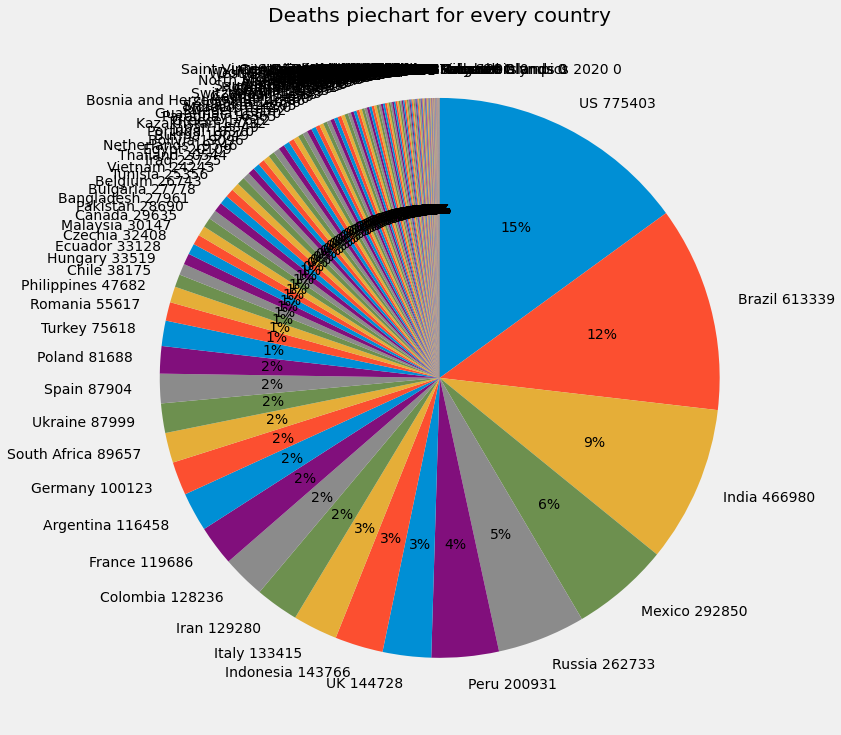

In [35]:
piechart('Deaths')

World total:  7237


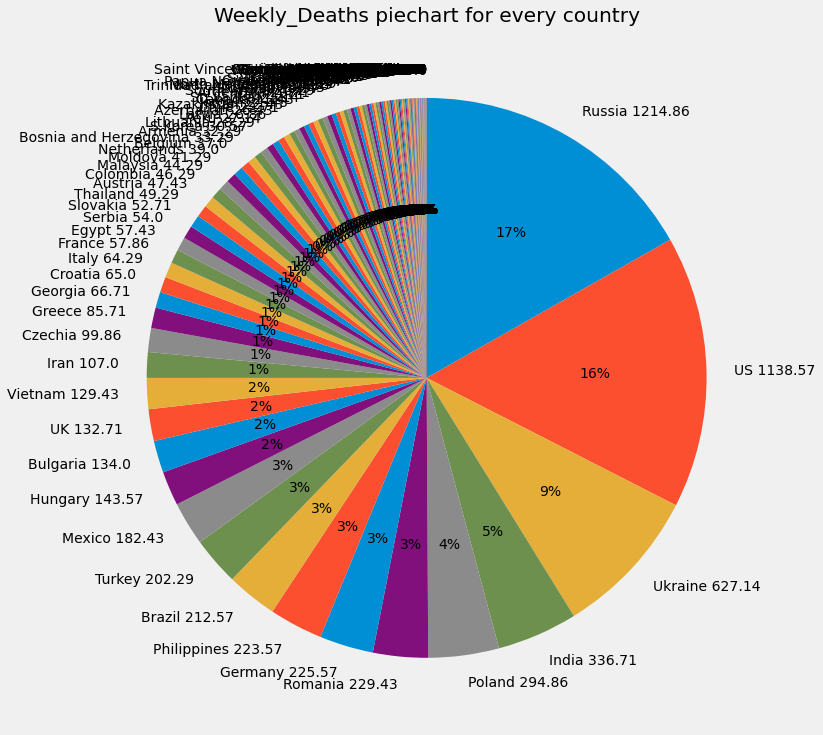

In [36]:
piechart('Weekly_Deaths')

World total:  8532


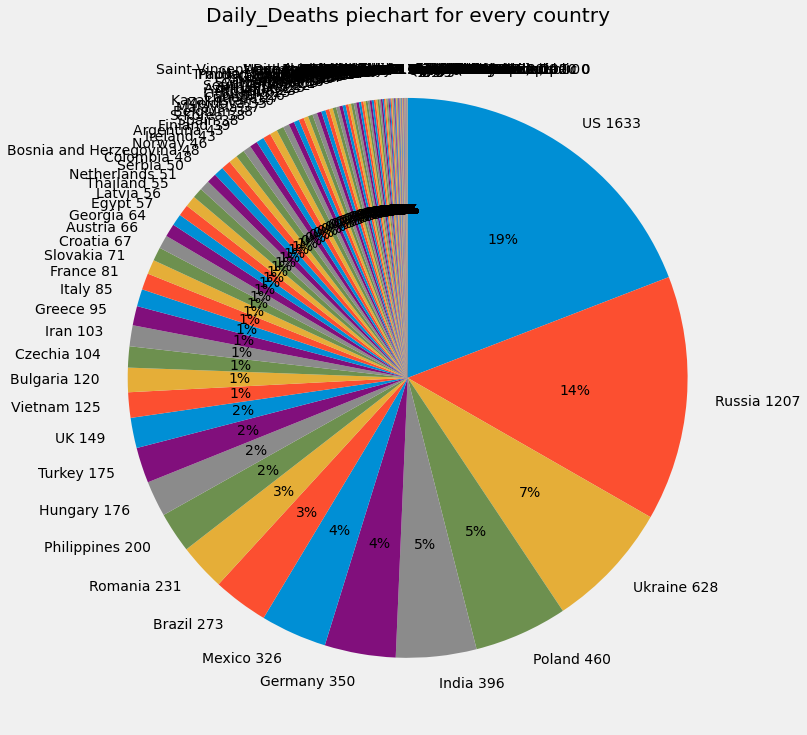

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-26


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1034932200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 96d4f5c] `date` update
 1 file changed, 2131 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)


To https://github.com/Arrowheadahp/COVID-19.git
   82e4b60..96d4f5c  master -> master
